# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 6. 10. 2024. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

> ❌ Zkopírovaný kód ze cvičení (především ze cvičení 2) nebude uznán!

> ‼️ Akceptovatelný je úkol pouze v češtině, slovenštině nebo angličtině.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# Homework

## Importing modules & reading CSVs

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
intakes_raw  = pd.read_csv('intakes.csv');
outcomes_raw = pd.read_csv('outcomes.csv');

display(intakes_raw.head())
display(outcomes_raw.head())

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


## Data preprocessing

Firstly we will import libraries and read files.

We will delete duplicated rows, so all further EDA will be correct.

In [3]:
print(f"Duplicated intakes:  {intakes_raw.duplicated().sum()}")
intakes_raw = intakes_raw.drop_duplicates()

print(f"Duplicated outcomes:  {outcomes_raw.duplicated().sum()}")
outcomes_raw = outcomes_raw.drop_duplicates()

Duplicated intakes:  32
Duplicated outcomes:  24


Now we will analyze intakes

In [4]:
def better_info(df):
    return pd.DataFrame({'NUnique' : df.nunique(), 'NaN%' : df.isna().mean() * 100 , 'Dtype' : df.dtypes})

print('Intakes',f"Number of features: {intakes_raw.shape[1]}", f"Number of samples: {intakes_raw.shape[0]}", '', sep='\n')
display(better_info(intakes_raw))

print('Outcomes', f"Number of features: {outcomes_raw.shape[1]}", f"Number of samples: {outcomes_raw.shape[0]}", '', sep='\n')
display(better_info(outcomes_raw))

Intakes
Number of features: 12
Number of samples: 167524



,NUnique,NaN%,Dtype
Animal ID,150561,0.000000,object
Name,29042,28.779757,object
DateTime,115549,0.000000,object
MonthYear,133,0.000000,object
Found Location,67994,0.000000,object
Intake Type,6,0.000000,object
Intake Condition,20,0.000000,object
Animal Type,5,0.000000,object
Sex upon Intake,5,0.001194,object
Age upon Intake,55,0.000597,object


Outcomes
Number of features: 12
Number of samples: 167535



,NUnique,NaN%,Dtype
Animal ID,150558,0.000000,object
Name,28979,28.697287,object
DateTime,139792,0.000000,object
MonthYear,133,0.000000,object
Date of Birth,8486,0.000000,object
Outcome Type,11,0.026263,object
Outcome Subtype,26,54.065121,object
Animal Type,5,0.000000,object
Sex upon Outcome,5,0.001791,object
Age upon Outcome,55,0.028054,object


### Extracting features

We will expand features like Age and Sex upon Income/Outcome for ease of analysis.

All transformations will be done in functions, so it will be possible to replicate them on both datasets. Then those functions will be stacked into pipeline.

Pipeline function is taken from [here](https://dzone.com/articles/python-function-pipelines-streamlining-data-proces)

In [5]:
import re

# Pipeline takes multiple functions as argument and returns an inner function
def pipeline(*funcs):
    def inner(data, **kwargs):
        result = data
        # Iterate thru every function
        for func in funcs:
            result = func(result, **kwargs)
        return result
    return inner

# Ensures immutability on pipeline level
def copy(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    return df.copy()

In [6]:
def extract_month_year(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    month_year = df['MonthYear'].str.extract(r'(\S+) (\S+)')
    df.loc[:, ['Month', 'Year']] = None
    df.loc[:,'Month'] = month_year[0]
    df.loc[:,'Year'] = month_year[1]
    df.drop(columns=['MonthYear'], inplace=True)
    return df

def expand_sex(df : pd.DataFrame, dataset, **kwargs) -> pd.DataFrame:
    col = f"Sex upon {dataset}"
    sterelization_sex = df[col].str.extract(r'(\S+) (male|female)', re.IGNORECASE)
    df.loc[:, ['Sterelization', 'Sex']] = None
    df.loc[:,'Sterelization'] = sterelization_sex[0]
    df.loc[:,'Sex'] = sterelization_sex[1]
    df.drop(columns=[col], inplace=True)
    return df

def expand_age(df : pd.DataFrame, dataset, **kwargs) -> pd.DataFrame:
    col = f"Age upon {dataset}"
    age_unit = df[col].str.extract(r'(\d+) (\S+)')
    df.loc[:, ['AgeNum', 'AgeUnit']] = None
    df.loc[:, 'AgeNum'] = age_unit[0]
    df.loc[:, 'AgeUnit'] = age_unit[1]
    df.drop(columns=[col], inplace=True)
    return df

def extract_mix(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    df['IsMixed'] = df['Breed'].str.contains(r'mix', flags=re.IGNORECASE)
    return df

In [7]:
extract = pipeline(
    extract_month_year,
    extract_mix,
    expand_sex,
    expand_age
)

outcome_df = extract(outcomes_raw.copy(), dataset='Outcome')
intake_df = extract(intakes_raw.copy(), dataset='Intake')
display(intake_df.head(), outcome_df.head())

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Beagle Mix,Tricolor,January,2019,True,Neutered,Male,2,years
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,English Springer Spaniel,White/Liver,July,2015,False,Spayed,Female,8,years
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Basenji Mix,Sable/White,April,2016,True,Intact,Male,11,months
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Domestic Shorthair Mix,Calico,October,2013,True,Intact,Female,4,weeks
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Domestic Shorthair,Orange Tabby,May,2022,False,Neutered,Male,2,years


,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,03/25/2023,Adoption,NaN,Cat,Domestic Shorthair Mix,Black/White,Jul,2023,True,Neutered,Male,3,months
1,A794011,Chunk,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Domestic Shorthair Mix,Brown Tabby/White,May,2019,True,Neutered,Male,2,years
2,A776359,Gizmo,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Chihuahua Shorthair Mix,White/Brown,Jul,2018,True,Neutered,Male,1,year
3,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Raccoon,Gray,Aug,2020,False,NaN,NaN,1,year
4,A720371,Moose,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Anatol Shepherd/Labrador Retriever,Buff,Feb,2016,False,Neutered,Male,4,months


### Marking missing values as NaN and Transforming columns individually

We will look at the short and rare strings and determine if some of them represent missing values.

In [8]:
def get_short_strings(df : pd.DataFrame, thr = 5):
    result = {'Column' : [], 'Short strings' : []}
    for col in df.columns:
        if df.dtypes[col] != object: continue
        tmp = df.loc[df[col].str.len() < thr, col].value_counts().tail(10).index.to_list()
        if len(tmp):
            result['Column'].append(col)
            result['Short strings'].append(tmp)
    result = pd.DataFrame(result)
    return pd.concat([result['Column'], result['Short strings'].apply(pd. Series)], axis=1).fillna('')

display('Intakes', get_short_strings(intake_df))
display('Outcomes', get_short_strings(outcome_df))

'Intakes'

,Column,0,1,2,3,4,5,6,7,8,9
0,Name,Fito,Putz,Reye,*Rhi,201,Edy,141,Krea,*Sir,*Tj
1,Intake Condition,Sick,Aged,,,,,,,,
2,Animal Type,Dog,Cat,Bird,,,,,,,
3,Breed,Pbgv,Rex,Pig,Hawk,Owl,Emu,Goat,Frog,Deer,Tosa
4,Color,Tan,Blue,Red,Gray,Buff,Fawn,Gold,Pink,,
5,Month,May,June,July,,,,,,,
6,Year,2014,2016,2017,2018,2021,2022,2023,2020,2024,2013
7,Sex,Male,,,,,,,,,
8,AgeNum,18,19,20,22,25,28,23,30,21,24
9,AgeUnit,year,days,week,day,,,,,,


'Outcomes'

,Column,0,1,2,3,4,5,6,7,8,9
0,Name,Ski,059,Xiqi,Mumo,R7,E.S.,Rexx,*Zan,B.C.,089
1,Outcome Type,Died,Lost,,,,,,,,
2,Outcome Subtype,Snr,SCRP,Prc,Barn,Emer,,,,,
3,Animal Type,Dog,Cat,Bird,,,,,,,
4,Breed,Dove,Pbgv,Rex,Pig,Hawk,Owl,Emu,Deer,Goat,Frog
5,Color,Tan,Blue,Red,Gray,Buff,Fawn,Gold,Pink,,
6,Month,Aug,Oct,Sep,May,Dec,Nov,Mar,Jan,Apr,Feb
7,Year,2015,2016,2017,2018,2021,2022,2023,2020,2024,2013
8,Sex,Male,,,,,,,,,
9,AgeNum,18,19,20,22,25,28,23,30,24,21


There are no suspicious values like '???' or '_', that would usually represent missing values. Note that we have reduced unknowns in 'Sex' column by explicitly extracting strings 'male' and 'female'.

Other thing we can do is to check for numeric symbols in names, as it is common to place ID for missing names.

In [9]:
num_in_name_intake = intake_df['Name'].str.contains(r'\d', na=False)

display(intake_df[num_in_name_intake])
display(intake_df[num_in_name_intake & (intake_df['Animal ID'] != intake_df['Name'])])

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
18,A856107,A856107,04/28/2022 11:56:00 AM,4700 Prock Lane in Austin (TX),Stray,Normal,Cat,Domestic Shorthair Mix,Black/White,April,2022,True,Intact,Male,1,month
25,A881801,A881801,05/26/2023 05:12:00 PM,4905 Lexington Meadow Lane in Travis (TX),Stray,Normal,Cat,Domestic Shorthair Mix,Calico,May,2023,True,Intact,Female,1,week
136,A882562,A882562,06/06/2023 11:36:00 AM,2008 Enfield Rd in Austin (TX),Stray,Normal,Cat,Domestic Medium Hair,Brown Tabby/White,June,2023,False,Intact,Male,3,weeks
140,A906884,A906884,06/08/2024 01:46:00 PM,21210 Cherry Hollow in Travis (TX),Stray,Sick,Cat,Domestic Shorthair Mix,Brown Tabby,June,2024,True,Intact,Male,1,month
154,A848445,A848445,12/20/2021 03:23:00 PM,2409 Sanders Lane in Austin (TX),Stray,Normal,Dog,Chihuahua Shorthair Mix,Brown/Black,December,2021,True,Intact,Female,3,weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167128,A914166,210 Grams,09/26/2024 04:39:00 PM,City Park Road in Austin (TX),Stray,Normal,Cat,Domestic Shorthair,White,September,2024,False,Intact,Male,2,weeks
167130,A914161,181 Grams,09/26/2024 04:39:00 PM,City Park Road in Austin (TX),Stray,Normal,Cat,Domestic Shorthair,White,September,2024,False,Intact,Male,2,weeks
167133,A914162,Trap 18,09/26/2024 06:50:00 PM,Austin (TX),Stray,Normal,Cat,Domestic Shorthair,Black,September,2024,False,Neutered,Male,8,months
167443,A914619,102 Grams,10/04/2024 07:33:00 AM,Barrington Way in Austin (TX),Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,October,2024,False,Intact,Female,2,days


,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
238,A784391,#9 Cassidy,11/15/2018 05:09:00 PM,13408 Frostdale Dr in Travis (TX),Public Assist,Nursing,Dog,Pit Bull Mix,Blue/White,November,2018,True,Intact,Female,0,years
242,A909207,149 Grams,07/11/2024 02:49:00 PM,8800 N Ih 35 in Austin (TX),Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,July,2024,False,Intact,Female,1,weeks
485,A853189,113 Grams,03/15/2022 07:16:00 AM,11000 Slaughter Creek Dr in Austin (TX),Stray,Sick,Cat,Domestic Shorthair,Brown Tabby/White,March,2022,False,Intact,Male,2,days
528,A902145,92 Grams,04/13/2024 01:48:00 PM,5617 Jfk in Travis (TX),Stray,Neonatal,Cat,Domestic Shorthair,White/Black,April,2024,False,Intact,Female,0,years
803,A758131,096,09/11/2017 04:54:00 PM,Outside Jurisdiction,Public Assist,Normal,Dog,Pit Bull Mix,Black Brindle/White,September,2017,True,Intact,Male,1,year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167124,A914163,184 Grams,09/26/2024 04:39:00 PM,City Park Road in Austin (TX),Stray,Normal,Cat,Domestic Shorthair,Brown Tabby,September,2024,False,Intact,Male,2,weeks
167128,A914166,210 Grams,09/26/2024 04:39:00 PM,City Park Road in Austin (TX),Stray,Normal,Cat,Domestic Shorthair,White,September,2024,False,Intact,Male,2,weeks
167130,A914161,181 Grams,09/26/2024 04:39:00 PM,City Park Road in Austin (TX),Stray,Normal,Cat,Domestic Shorthair,White,September,2024,False,Intact,Male,2,weeks
167133,A914162,Trap 18,09/26/2024 06:50:00 PM,Austin (TX),Stray,Normal,Cat,Domestic Shorthair,Black,September,2024,False,Neutered,Male,8,months


In [10]:
outcome_df[outcome_df['Name'].str.contains(r'\d+', na=False)]

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
28,A878380,A878380,04/15/2023 10:15:00 AM,04/11/2021,Euthanasia,Suffering,Cat,Siamese Mix,Lilac Point,Apr,2023,True,Intact,Male,2,years
37,A886502,A886502,08/09/2023 12:13:00 PM,07/01/2023,Return to Owner,NaN,Dog,Pit Bull,Chocolate,Aug,2023,False,Intact,Female,1,month
55,A851472,A851472,02/17/2022 12:46:00 PM,09/13/2020,Transfer,Partner,Dog,Cairn Terrier Mix,Tan/White,Feb,2022,True,Intact,Male,1,year
72,A839936,A839936,08/02/2021 05:57:00 PM,05/29/2021,Adoption,NaN,Dog,Labrador Retriever,Black/White,Aug,2021,False,Neutered,Male,2,months
104,A859541,A859541,06/20/2022 08:39:00 PM,06/08/2022,Died,In Kennel,Dog,German Shepherd Mix,Black/Brown,Jun,2022,True,Intact,Female,1,weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167257,A835145,A835145,05/24/2021 12:06:00 PM,05/23/2021,Transfer,Partner,Cat,Domestic Shorthair,Brown Tabby,May,2021,False,Intact,Female,1,day
167269,A911726,A911726,08/25/2024 12:00:00 AM,08/16/2024,Died,In Foster,Cat,Domestic Shorthair,Blue,Aug,2024,False,Intact,Female,1,weeks
167299,A852775,A852775,05/18/2022 02:13:00 PM,01/31/2022,Adoption,Foster,Cat,Domestic Medium Hair Mix,Tortie,May,2022,True,Spayed,Female,3,months
167314,A854626,A854626,05/03/2022 04:10:00 PM,02/27/2022,Adoption,Foster,Cat,Domestic Shorthair Mix,Orange Tabby,May,2022,True,Neutered,Male,2,months


As we can see, there are many pets with IDs as their names, also there are some names containing numbers. Most of them look like the weight of a found pet or number of a trap, where they were found, so we will mark them NaN too.

After putting nulls into right places we will remove asterisk from names.
We will also delete 'A' at the start of ID, so it will be convertible to integer.

Let's focus on 'Outcome type' feature.

In [11]:
outcome_df['Outcome Type'].value_counts()

Outcome Type
Adoption           80714
Transfer           47395
Return to Owner    25199
Euthanasia         10459
Died                1583
Rto-Adopt           1186
Disposal             831
Missing               89
Relocate              27
Stolen                 5
Lost                   3
Name: count, dtype: int64

There are two points to notice, first 'Missing' value, we will convert it into null later, and two categories 'Rto-Adopt' and 'Return to Owner'. RTO stands for ['Return to owner'](https://humanepro.org/blog/return-owner), so basically they represent the same category, we will merge 'Rto-Adopt' into 'Return to Owner'.

Lastly we will check common missing values.

In [12]:
MISSING_STRINGS = [ 'unknown', 'missing', 'novalue', 'no value', 'nodata', 'no data']

df = pd.DataFrame(columns=MISSING_STRINGS, index=list(outcome_df.columns) + ['Total'])

for pat in MISSING_STRINGS:
    counter = 0
    for col in outcome_df.select_dtypes(object).columns:
        df.loc[col, pat] = (outcome_df[col].str.lower() == pat).sum()
        counter += df.loc[col, pat]
    df.loc['Total', pat] = counter
df

,unknown,missing,novalue,no value,nodata,no data
Animal ID,0,0,0,0,0,0
Name,73,0,0,0,0,0
DateTime,0,0,0,0,0,0
Date of Birth,0,0,0,0,0,0
Outcome Type,0,89,0,0,0,0
Outcome Subtype,0,0,0,0,0,0
Animal Type,0,0,0,0,0,0
Breed,3,0,0,0,0,0
Color,1,0,0,0,0,0
Month,0,0,0,0,0,0


There are some values marked as 'Unknown' in different columns, we will mark them NaN.

In [13]:
def name_transformer(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    df.loc[df['Name'].str.contains(r'\d', na=False), 'Name'] = np.nan
    df['Name'] = df['Name'].str.findall(r'([^\*])').str.join('')
    return df

def id_transformer(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    df['Animal ID'] = df['Animal ID'].str.extract(r'A(\d+)')
    return df

def outcome_type_transformer(df : pd.DataFrame, dataset, **kwargs) -> pd.DataFrame:
    if dataset != 'Outcome':
        return df
    df['Outcome Type'] = df['Outcome Type'].replace({
        'Missing' : np.nan,
        'Rto-Adopt' : 'Return to Owner'
    })
    return df

def unknown_deleter(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    df.replace({'Unknown' : np.nan}, inplace=True)
    return df

In [14]:
transform = pipeline(
    id_transformer,
    name_transformer,
    outcome_type_transformer,
    unknown_deleter
)

display(
    transform(outcome_df, dataset='Outcome').head(),
    transform(intake_df, dataset='Intake').head()
)

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
0,882831,Hamilton,07/01/2023 06:12:00 PM,03/25/2023,Adoption,NaN,Cat,Domestic Shorthair Mix,Black/White,Jul,2023,True,Neutered,Male,3,months
1,794011,Chunk,05/08/2019 06:20:00 PM,05/02/2017,Return to Owner,NaN,Cat,Domestic Shorthair Mix,Brown Tabby/White,May,2019,True,Neutered,Male,2,years
2,776359,Gizmo,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Chihuahua Shorthair Mix,White/Brown,Jul,2018,True,Neutered,Male,1,year
3,821648,NaN,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Raccoon,Gray,Aug,2020,False,NaN,NaN,1,year
4,720371,Moose,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Anatol Shepherd/Labrador Retriever,Buff,Feb,2016,False,Neutered,Male,4,months


,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Breed,Color,Month,Year,IsMixed,Sterelization,Sex,AgeNum,AgeUnit
0,786884,Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Beagle Mix,Tricolor,January,2019,True,Neutered,Male,2,years
1,706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,English Springer Spaniel,White/Liver,July,2015,False,Spayed,Female,8,years
2,724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Basenji Mix,Sable/White,April,2016,True,Intact,Male,11,months
3,665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Domestic Shorthair Mix,Calico,October,2013,True,Intact,Female,4,weeks
4,857105,Johnny Ringo,05/12/2022 12:23:00 AM,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Domestic Shorthair,Orange Tabby,May,2022,False,Neutered,Male,2,years


### Correcting data types

Let's take a look at the data that we have processed so far

In [15]:
display(better_info(outcome_df))

,NUnique,NaN%,Dtype
Animal ID,150558,0.000000,object
Name,20119,31.454323,object
DateTime,139792,0.000000,object
Date of Birth,8486,0.000000,object
Outcome Type,9,0.079386,object
Outcome Subtype,26,54.065121,object
Animal Type,5,0.000000,object
Breed,2963,0.001791,object
Color,652,0.000597,object
Month,12,0.000000,object


We will turn Age into integer, we will use granularity of a day and then calculate age with granularity of a month and a year.

'Animal ID' and 'Year' will be turned into integer as well.

Next we will turn 'DateTime' and 'Date of Birth' into datetime64.

Sterelization will be turned into bool, with true pet being neutered or spayed.

Breed and Color will be left as strings as they are not really categorical, but a collection of highly cluttered categories. It will be easier to work with them as a single highly inoformative strings.

In [16]:
tmp = outcome_df[['AgeUnit', 'AgeNum']].copy()
tmp['AgeNum'] = tmp['AgeNum'].astype('Int64')
tmp.groupby('AgeUnit').agg(['min', 'max'])

AgeNum    
           min max
AgeUnit           
day          1   1
days         2   6
month        1   1
months       2  11
week         1   1
weeks        1   5
year         1   1
years        0  30

In [17]:
pd.set_option("future.no_silent_downcasting", True)

def age_type(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    MULTIPLIER = { 'day' : 1, 'week' : 7, 'month' : 30, 'year' : 365}
    mult = df['AgeUnit'].str.extract(r'(day|week|month|year)', expand=False).replace(MULTIPLIER).astype('Int32')
    df['AgeDays'] = df['AgeNum'].astype('Int32') * mult
    df['AgeMonths'] = df['AgeDays'] // 30
    df['AgeYears'] = df['AgeDays'] // 365
    df.drop(columns=['AgeUnit', 'AgeNum'], errors='ignore', inplace=True)
    return df

def id_type(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    df['Animal ID'] = df['Animal ID'].astype(np.int32)
    return df

def year_type(df : pd.DataFrame, **kawrgs) -> pd.DataFrame:
    df['Year'] = df['Year'].astype(np.int32)
    return df

def datetime_types(df : pd.DataFrame, dataset, **kwargs) -> pd.DataFrame:
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
    if dataset == 'Outcome':
        df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%m/%d/%Y')
    return df

def sterelization_type(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    df['IsSterelized'] = df['Sterelization'].str.contains('Intact', flags=re.IGNORECASE).astype(bool)
    df.drop(columns=['Sterelization'], errors='ignore', inplace=True)
    return df

def categorizy(df : pd.DataFrame, **kwargs) -> pd.DataFrame:
    month_cat = pd.CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
    df['Month'] = df['Month'].astype(month_cat)
    columns = list(set(df.head(0).select_dtypes(object)) - {'Name', 'Color', 'Breed', 'Found Location'})
    df[columns] = df[columns].astype('category')
    return df

In [18]:
typing = pipeline(
    age_type,
    id_type,
    year_type,
    datetime_types,
    sterelization_type,
    categorizy
)

display(typing(intake_df, dataset='Intake').head())
display(typing(outcome_df, dataset='Outcome').head())

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Breed,Color,Month,Year,IsMixed,Sex,AgeDays,AgeMonths,AgeYears,IsSterelized
0,786884,Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Beagle Mix,Tricolor,January,2019,True,Male,730,24,2,False
1,706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,English Springer Spaniel,White/Liver,July,2015,False,Female,2920,97,8,False
2,724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Basenji Mix,Sable/White,April,2016,True,Male,330,11,0,True
3,665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Domestic Shorthair Mix,Calico,October,2013,True,Female,28,0,0,True
4,857105,Johnny Ringo,2022-05-12 00:23:00,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Domestic Shorthair,Orange Tabby,May,2022,False,Male,730,24,2,False


,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Breed,Color,Month,Year,IsMixed,Sex,AgeDays,AgeMonths,AgeYears,IsSterelized
0,882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,NaN,Cat,Domestic Shorthair Mix,Black/White,NaN,2023,True,Male,90,3,0,False
1,794011,Chunk,2019-05-08 18:20:00,2017-05-02,Return to Owner,NaN,Cat,Domestic Shorthair Mix,Brown Tabby/White,May,2019,True,Male,730,24,2,False
2,776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,NaN,Dog,Chihuahua Shorthair Mix,White/Brown,NaN,2018,True,Male,365,12,1,False
3,821648,NaN,2020-08-16 11:38:00,2019-08-16,Euthanasia,NaN,Other,Raccoon,Gray,NaN,2020,False,NaN,365,12,1,True
4,720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,NaN,Dog,Anatol Shepherd/Labrador Retriever,Buff,NaN,2016,False,Male,120,4,0,False


In [19]:
preprocess = pipeline(
    copy,
    extract,
    transform,
    typing
)


intake = preprocess(intakes_raw, dataset='Intake')
outcome = preprocess(outcomes_raw, dataset='Outcome')

After all transformations we can check if 'Year' and 'Month' features correspond to 'DateTime' month and year

In [20]:
print('Does DateTime coincide with Month and Year (Intake): ', all(
    ((intake['Month'].isna() | ((intake['DateTime'].dt.month - 1) == intake['Month'].cat.codes))) # Matching month. Categories codes start from 0, while datetime64 start from 1, so we subtract one from later
    & 
    (intake['Year'].isna() | (intake['DateTime'].dt.year == intake['Year'])) # Matching years
))

print('Does DateTime coincide with Month and Year (Outcome): ', all(
    ((outcome['Month'].isna() | ((outcome['DateTime'].dt.month - 1) == outcome['Month'].cat.codes))) # Matching month. Categories codes start from 0, while datetime64 start from 1, so we subtract one from later
    & 
    (outcome['Year'].isna() | (outcome['DateTime'].dt.year == outcome['Year'])) # Matching years
))

Does DateTime coincide with Month and Year (Intake):  True
Does DateTime coincide with Month and Year (Outcome):  True


They are the same, so we can delete 'Year' and 'Month' features

In [21]:
def remove_month_year(df : pd.DataFrame, dataset, **kwargs) -> pd.DataFrame:
    df.drop(columns=['Month', 'Year'], inplace=True)
    return df

preprocess = pipeline(
    copy,
    extract,
    transform,
    typing,
    remove_month_year
)

intake = preprocess(intakes_raw, dataset='Intake')
outcome = preprocess(outcomes_raw, dataset='Outcome')

In [22]:
display(better_info(intake), better_info(outcome))

,NUnique,NaN%,Dtype
Animal ID,150561,0.000000,int32
Name,20174,31.544137,object
DateTime,115549,0.000000,datetime64[ns]
Found Location,67994,0.000000,object
Intake Type,6,0.000000,category
Intake Condition,19,0.014923,category
Animal Type,5,0.000000,category
Breed,2965,0.001791,object
Color,649,0.000597,object
IsMixed,2,0.000000,bool


,NUnique,NaN%,Dtype
Animal ID,150558,0.000000,int32
Name,20119,31.454323,object
DateTime,139792,0.000000,datetime64[ns]
Date of Birth,8486,0.000000,datetime64[ns]
Outcome Type,9,0.079386,category
Outcome Subtype,26,54.065121,category
Animal Type,5,0.000000,category
Breed,2963,0.001791,object
Color,652,0.000597,object
IsMixed,2,0.000000,bool


## Descriptive statistics

Let's firestly look at missing values, we will use bargraph for that.

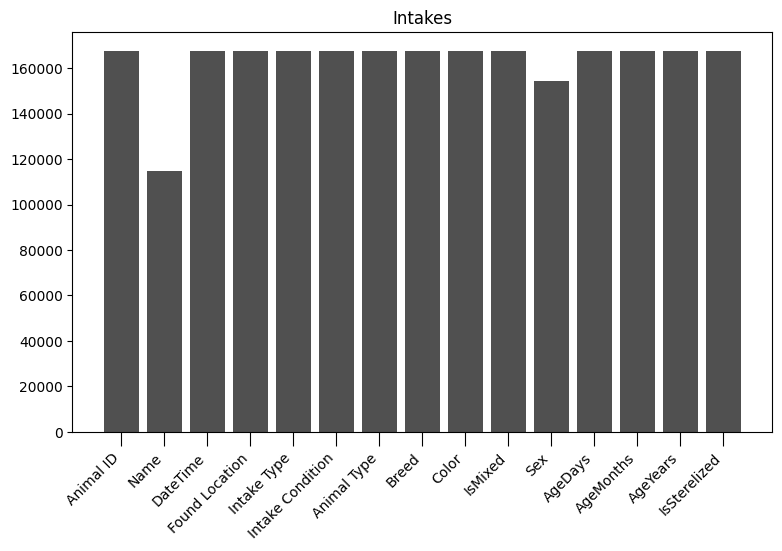

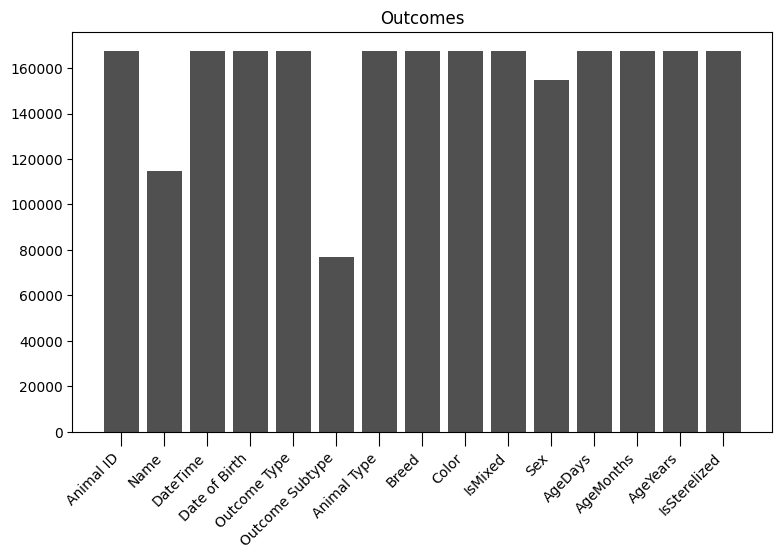

In [23]:
def bar_missing(df : pd.DataFrame, title='') -> None:
    nans = df.notna().sum()
    fig = plt.figure(figsize=(7, 4))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(nans.index, nans, color='#505050')
    ax.set_xticks(range(nans.shape[0]), nans.index, rotation=45, ha='right', va='top')
    ax.tick_params(axis='x', length=10.0)
    ax.set_title(title)
    display(fig)

bar_missing(intake, title='Intakes')
bar_missing(outcome, title='Outcomes')
plt.close('all')

### Describing Age

We will describe 'Age' in days as it is the mose precise resolution that we can get this data in. To detect outliers we will use 3-sigma test.

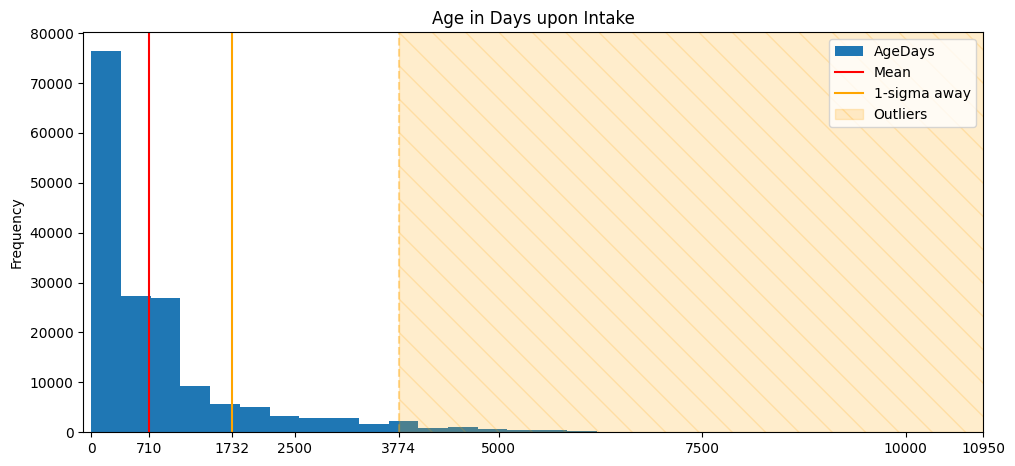

In [24]:
age = intake['AgeDays']

outlier_border = age.mean() + 3 * age.std()

fig = plt.figure(figsize=(9, 4))
ax = fig.add_axes([0,0,1,1])
age.plot.hist(
    ax=ax, bins=30
)
ax.axvline(age.mean(), color='r', label='Mean')
ax.axvline(age.mean() + age.std(), color='orange', label='1-sigma away')
ax.axvline(outlier_border, color='orange', alpha=0.4, linestyle='--')
ax.axvspan(
    outlier_border, ax.dataLim.xmax, 
    color='orange', alpha=0.2,
    label='Outliers', hatch='\\'
)

ax.xaxis.set_major_locator(ticker.FixedLocator([2500*i for i in range(5)] + [age.max(), age.mean(), age.mean() + age.std(), outlier_border]))
ax.set_xlim(-100, age.max())

ax.set_title('Age in Days upon Intake')
ax.legend(loc='upper right')
plt.show()

Age upon intake is weighted towards zero. It is expected, because homeless animals give birth to several homeless pups, also people tend not to abandond pets, with whom they have spent long time, so older pets are rarer kicked out of home. Nevertheless, little to no pet can live more then 10 years, andd our visualisation shows that, by placing outlier border near 10 years.

### Describing DateTime

It is impractical to look at the distribution of 'DateTime', as it is an amalgamation of several independent variables, so it will be much more meaningful to inspect them separated. The aspects that we will be inspecting are year, day of the year and hour, so combination of those three covers whole range of timestamps with adequate granularity.

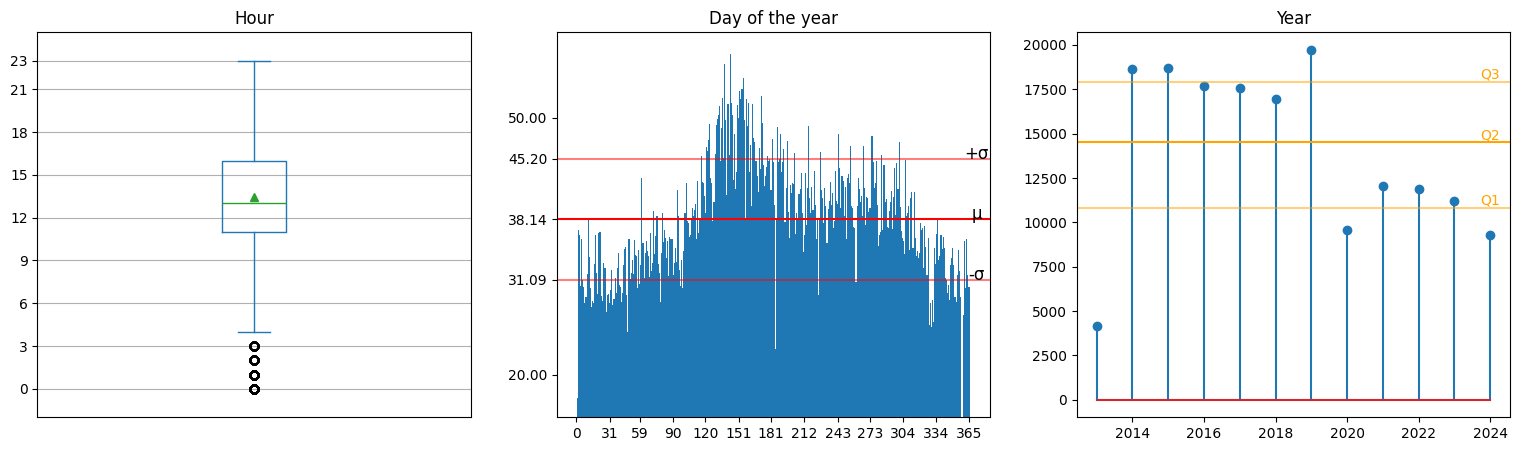

In [25]:
from matplotlib.dates import YearLocator, MonthLocator

dt = intake['DateTime']

year = dt.dt.year
day = dt.dt.dayofyear
hour = dt.dt.hour

vc_year = year.value_counts()
q1, q2, q3 = vc_year.quantile(0.25), vc_year.median(), vc_year.quantile(0.75)
day = dt.dt.dayofyear
hour = dt.dt.hour

fig, [ax_h, ax_d, ax_y] = plt.subplots(1, 3, figsize=(19, 5))
ax_y.stem(
    vc_year.index, vc_year
)
ax_y.set_title('Year')
ax_y.axhline(q1, color='orange', alpha=0.5)
ax_y.axhline(q2, color='orange', alpha=1.0)
ax_y.axhline(q3, color='orange', alpha=0.5)

for txt, xy in zip(['Q1', 'Q2', 'Q3'], [ (2024, q) for q in (q1, q2, q3)]):
    ax_y.annotate(
        txt, xy=xy, color='orange', ha='center', va='bottom'
    )

vc_day = day.value_counts() / year.nunique()
ax_d.bar(
    vc_day.index, vc_day, width=1.0
)
ax_d.xaxis.set_major_locator(MonthLocator())
day_stat = [ vc_day.mean() + i * vc_day.std() for i in [-1,0,1] ]
ax_d.axhline(day_stat[0], color='r', alpha=0.5)
ax_d.axhline(day_stat[1], color='r', alpha=1.0)
ax_d.axhline(day_stat[2], color='r', alpha=0.5)
ax_d.yaxis.set_major_locator(ticker.FixedLocator([20, 50] + day_stat))
ax_d.set_ylim(15, 60)
ax_d.set_title('Day of the year')

for txt, xy in zip(['-σ', 'μ', '+σ'], [ (372, i) for i in day_stat]):
    ax_d.annotate(
        txt, xy=xy, color='black', fontsize=12, ha='center', va='baseline'
    )

hour.plot.box(
    ax=ax_h,
    grid=True, showmeans=True
)
ax_h.set_title('Hour')
ax_h.set_ylim(-2, 25)
ax_h.set_xticks([])
ax_h.yaxis.set_major_locator(ticker.FixedLocator([ 3*i for i in range(8) ] + [23]))

plt.show()

Intake hours are mostly concentrated in the afternoon, one hypothesis could be, that  most veterinars work at that time, and whole distribution is tilted towards late hours, with outliers from 12 PM until 3 AM.

There are more intakes during summer, on average AAC intakes 38 pets.

Median of intakes that AAC manages each year is approximately 15 000, with numbers dropping after 2020. We could theoretise, that such a sharp decay was result of COVID19, thou it does not explain why does not numbers return to preCOVID values.

### Generic quantative describer

All quantative data is displayed similaly, so we will write a function that will do it automatically and put some color into this presentation.

In [26]:
from typing import Tuple

def display_quantative(ser : pd.Series, display_thr=1, display_nan=False,
                       ax=None,
                       **kwargs) -> Tuple[mpl.figure.Figure, mpl.axes.Axes]|None:
    vc = ser.value_counts(dropna=(not display_nan))
    vc.index = vc.index.astype(str)
    mode_val, mode = vc.idxmax(), vc.max()
    fig = None
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 5))
    ax.grid(zorder=0)
    ax.bar(vc.index, vc, zorder=3, **kwargs)

    # We will display only values that differ in display_thr percents. pd.Series.diff() is not exactly it, but works fine
    vc_procent = vc / ser.count() * 100
    diffs = -vc_procent.copy().sort_values(ascending=False).diff()
    index = (diffs > display_thr) | diffs.isna()
    vc = vc[index]
    vc_procent = vc_procent[index]
    
    left_labels = vc.to_list()
    right_labels = [ f"{i:.2f}%" for i in vc_procent ]
    ax.set_yticks(
        left_labels, left_labels
    )
    y2 = ax.twinx()
    y2.set_ylim(ax.get_ylim())
    y2.set_yticks(
        left_labels, right_labels
    )
    if fig is None:
        return None
    return fig, ax

### Describing Animal Type

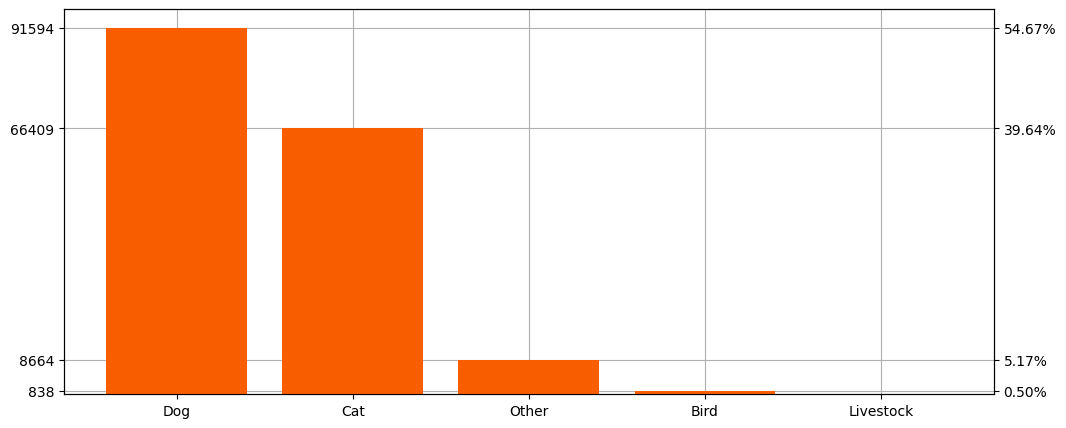

In [27]:
fig, ax = display_quantative(outcome['Animal Type'], color='#F85E00')

Unsurprisingly dog is by far the most intaken animal. Cats come in second, summing up with pups in 95.34% of all animals. Because we are dealing with city animal asylum it is expected, that allmost all intakes would be pets, canines and felines are primal example of those.

### Describing Intake condition

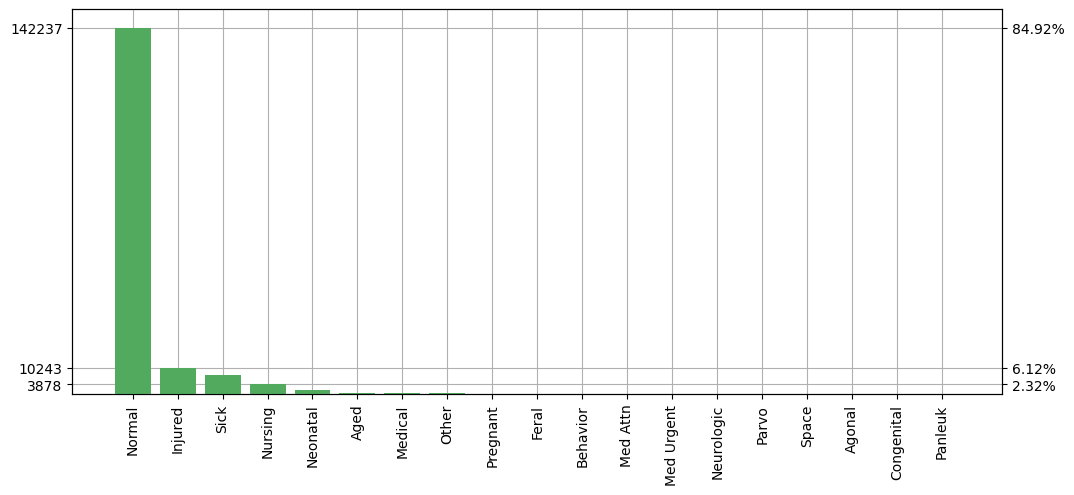

In [28]:
fig, ax = display_quantative(intake['Intake Condition'], display_thr=2, color='#52AA5E')
_ = ax.set_xticks(
    ax.get_xticks(), ax.get_xticklabels(),
    rotation=90
)

Most of the animals (luckily) come in normal condition, but remaining 15% are animals that require veterinar's help.

### Describing Outcome Type

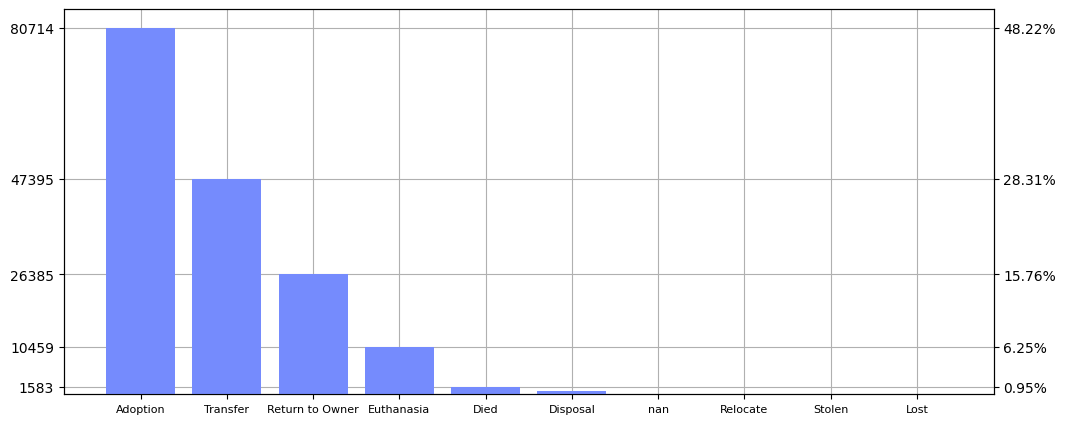

In [29]:
fig, ax = display_quantative(
    outcome['Outcome Type'], 
    display_thr=2,
    display_nan=True,
    color='#758BFD'
)
_ = ax.set_xticks(
    ax.get_xticks(), ax.get_xticklabels(), fontsize=8
)

Allmost half of the animals are adopted, combining with 15% of those who are returned to owners, it is easy to say, that most animals end up lucky. 7% of animals are euthanized or die in the asylums.

### Correlation

We will check for correlation between day of the year and age of intaken animals.

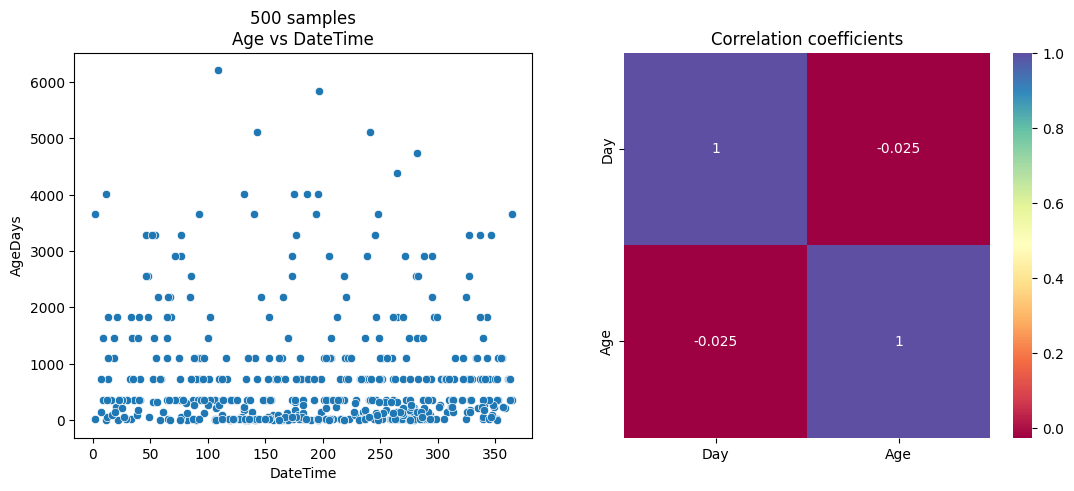

In [30]:
day = intake['DateTime'].dt.dayofyear
age = intake['AgeDays']
idx = age.sample(500, random_state=42).index
df = pd.DataFrame({'Day' : day, 'Age' : age})

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 5))

sns.scatterplot(
    x=day[idx], y=age[idx],
    ax=ax1
)
ax1.set_title("500 samples\nAge vs DateTime")
sns.heatmap(
    df.corr().T,
    ax=ax2,
    annot=True,
    cmap='Spectral'
)
ax2.set_title('Correlation coefficients')
plt.show()

There is no correlation, the scatterplot on the right does guide neither into positive nor negative correlation and offdiagonal heatmap values are close to zero, so numeric methods show us that features are uncorrelated.

## Given questions

### Is type of outcome dependent on type of intake?
This questions touches two categorical features, so we have no other choice, than to compare every type of intakes against every type of outcome. Then we will use heatmap for deductions.

In [31]:
in_no_dup = intake[~intake['Animal ID'].duplicated()]
out_no_dup = outcome[~outcome['Animal ID'].duplicated()]

df = pd.merge(
    in_no_dup, out_no_dup, 
    how='inner', on='Animal ID',
    suffixes=('_in', '_out')
)
df_types = df[['Intake Type', 'Outcome Type']]
display(df_types.head(), df_types.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149744 entries, 0 to 149743
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Intake Type   149744 non-null  category
 1   Outcome Type  149630 non-null  category
dtypes: category(2)
memory usage: 293.2 KB


,Intake Type,Outcome Type
0,Stray,Transfer
1,Stray,Return to Owner
2,Stray,Return to Owner
3,Stray,Transfer
4,Public Assist,Transfer


None

Now we will make crosstab of outcome and intake types. It will calculate number of samples in intersection of each category. Then we will transform each value into percent with respect to its intake type. Using that we will be able to universally decide if there are tendencies for some types.

'Control that every column sums to 100%'

Intake Type
Abandoned             100.0
Euthanasia Request    100.0
Owner Surrender       100.0
Public Assist         100.0
Stray                 100.0
Wildlife              100.0
dtype: float64

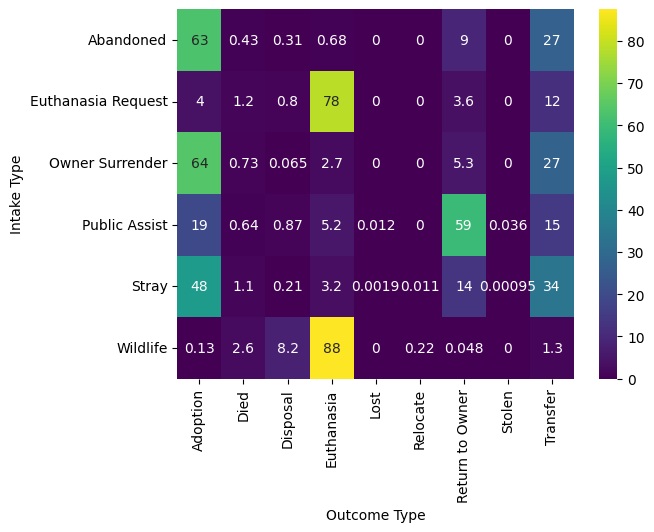

In [32]:
ct = pd.crosstab(df_types['Outcome Type'], df_types['Intake Type'])
for col in ct.columns:
    ct[col] = ct[col] * 100 / ct[col].sum()
display('Control that every column sums to 100%', ct.sum())
sns.heatmap(
    ct.T,
    annot=True,
    cmap='viridis'
)
plt.show()

We can see that abandoned, surrendered and stray animals are usually adopted, though they are sometimes trainsfered. Allmost all of wildlife animals are euthanized, but animals that are taken with euthanasia request have a chance to be transfered. More than a half of animals that are publically assisted to asylum are returned to their owners.

Summing up, outcome type is highly dependent on intake type.

### Does age of an animal influence its adoption?

Firstly let's notice that division between adopted and non-adopted animals is a little bit too coarse. It would be more meaningful to distiguish between animals that were adopted, returned to their owners and those with other ends. We stress it, because the older pet gets the greater chances of its owner coming for it. It is unsure whether we should count RTOs as adopted or non-adopted, so we will make ternary category.

In [33]:
simple_out_type = pd.CategoricalDtype(['Adoption', 'Return to Owner', 'Not Adopted'], ordered=False)

age = outcome['AgeYears']
vc = age.value_counts()
idx = age.isin(set(vc[vc > 100].index.to_list()))
age = age[idx]
out = pd.Categorical(
    outcome['Outcome Type'], 
    categories=['Adoption', 'Return to Owner']
).astype(simple_out_type).fillna('Not Adopted')[idx]
df = pd.DataFrame({'Age' : age, 'Outcome Type' : out})
df.head(3)

,Age,Outcome Type
0,0,Adoption
1,2,Return to Owner
2,1,Adoption


Now we will make a percentage plot of each type with respect to age.

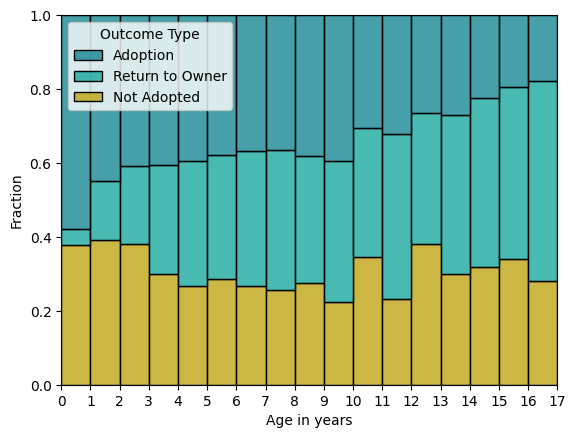

In [34]:
ax = sns.histplot(
    df, x='Age', 
    hue='Outcome Type', multiple='fill',
    palette={
        'Adoption':'#087F8C',
        'Return to Owner':'#0ba399',
        'Not Adopted':'#BB9F06'
    },
    binwidth=1.0, bins=age.nunique()
)
ax.set_xlabel('Age in years')
ax.set_ylabel('Fraction')
ax.xaxis.set_major_locator(ticker.LinearLocator(age.nunique()))

There is a clear tendency for older pets to be returned to their owners and younger animals to be adopted. In addition we can see that fraction of unadopted animals declines as they get older.

Altogether, older animals are taken into houses (adopted or taken by owners) a little bit more often, than younger ones.

### Does rate of intakes depend on season?

DateTime column represents time at which an animal was taken, so it would be practical to use for this task.

We will use similar barchart for this, as we used in descrbing datetime section.

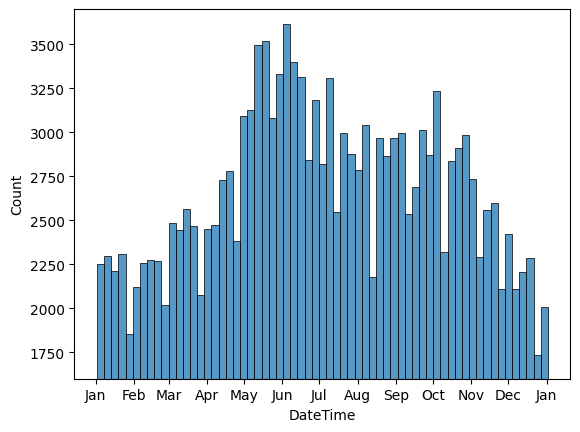

In [35]:
from matplotlib.dates import MonthLocator, DateFormatter

day = intake['DateTime'].dt.dayofyear
ax = sns.histplot(day)
ax.set_ylim(1600, 3700)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

We can see that there were more records from April until October. Thou it does not directly tell us that, there were more intakes, but under assumption that AAC reported most of intakes, we can say that during warm monthes number of intakes was higher. One of the things, that may have caused it was that when cold hits, animals tend to hide and contact with people less.

## Own questions

### Do more animals get adopted in eves of holidays?

We will solve this using barplot with holidays marked separatly.

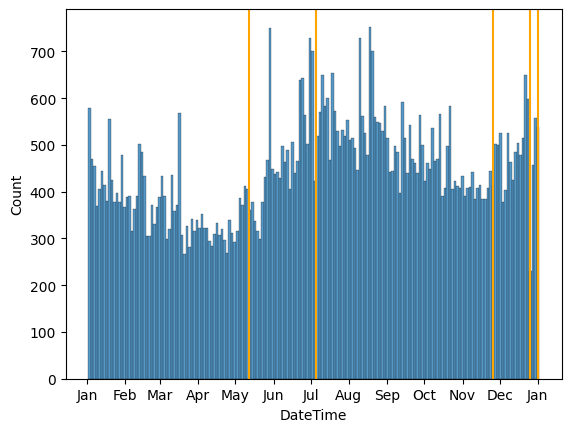

In [36]:
# pandas tserise holiday module has only federal goverments
holidays = pd.to_datetime(['2001-12-31', '2001-05-11', '2001-07-04', '2001-11-25', '2001-12-25']).dayofyear
# New Year, Mother's Day, Independence day, Thanksgiving day, Christmas

adopted = outcome.loc[outcome['Outcome Type'] == 'Adoption', 'DateTime'].dt.dayofyear.sort_values()
ax = sns.histplot(
    adopted,
    bins=36*5

)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
for holiday in holidays:
    ax.axvline(holiday, color='orange')

There are no expressive spikes that would be a clear sign, but there is a stedy growth between Thanksgiving and Christmas. Spike near the Independence day could easily be noise.

### What influence does sex, sterelization and being mixed have on adoption?

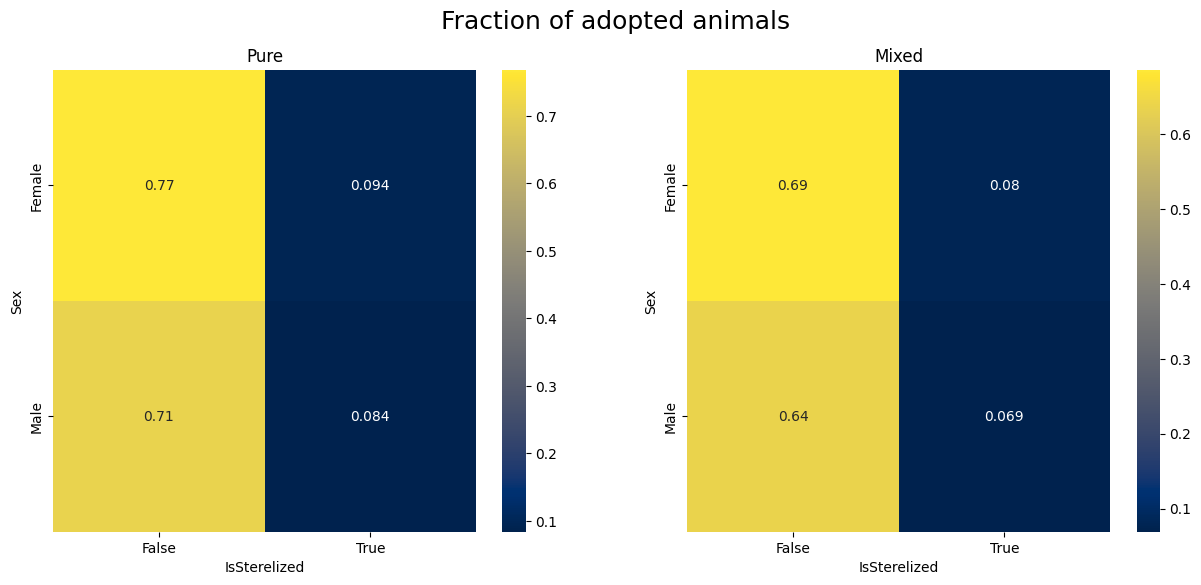

In [37]:
mixed = outcome[outcome['IsMixed']]
unmixed = outcome[~outcome['IsMixed']]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 6))

def plot_heatmap(df : pd.DataFrame, ax) -> None:
    adopted = df[df['Outcome Type'] == 'Adoption']
    ct = pd.crosstab(adopted['Sex'], adopted['IsSterelized'])
    ct /= pd.crosstab(df['Sex'], df['IsSterelized'])
    sns.heatmap(
        ct, ax=ax,
        annot=True,
        cmap='cividis'
    )

fig.suptitle('Fraction of adopted animals', fontsize=18)
plot_heatmap(unmixed, ax1)
ax1.set_title('Pure')
plot_heatmap(mixed, ax2)
ax2.set_title('Mixed')
plt.show()

Firsly we can notice that pure breeds are adopted more often, than mixed, and female animals are slightly more likely to be adopted. The main difference comes from animals being sterelized.

### What color of cat is returned to owner or euthanized the most?

For this question we will use only monochrome cats

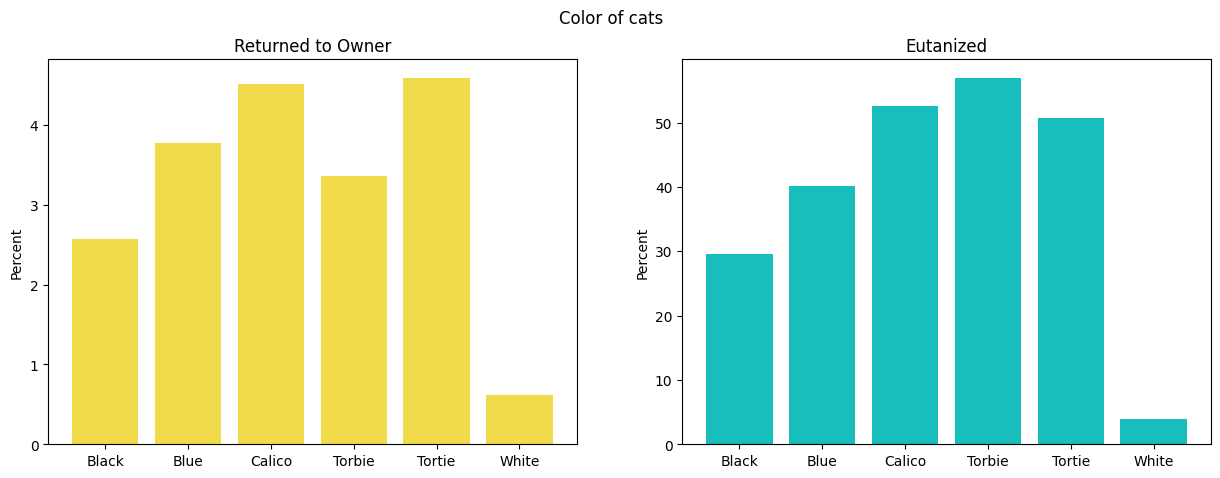

In [117]:
idx = (outcome['Animal Type'] == 'Cat') & ~outcome['Color'].str.contains(r'\W', na=False)
color = outcome.loc[idx, 'Color']
vc = color.value_counts()
idx &= outcome['Color'].isin((vc[vc > 500].index))

RTO = outcome[idx & (outcome['Outcome Type'] == 'Return to Owner')]
div = outcome['Color'].value_counts()
Euthanaisa = outcome[idx & (outcome['Outcome Type'] == 'Adoption')]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Color of cats')
ax1.set_title('Returned to Owner')
vc_rto = RTO['Color'].value_counts().astype(float)
for color in vc_rto.index:
    vc_rto[color] = vc_rto[color] * 100 / div[color] 
vc_rto.sort_index(inplace=True)
ax1.bar(
    vc_rto.index, vc_rto, color='#F1DB4B'
)
ax1.set_ylabel('Percent')

ax2.set_title('Eutanized')
vc_eut = Euthanaisa['Color'].value_counts().astype(float)
for color in vc_rto.index:
    vc_eut[color] = vc_eut[color] * 100 / div[color]
vc_eut.sort_index(inplace=True)
ax2.bar(
    vc_eut.index, vc_eut, color='#17BEBB'
)
ax2.set_ylabel('Percent')
plt.show()

## References

[Stack overflow](https://stackoverflow.com/)

[Matplotlib documentation](https://matplotlib.org/stable/index.html)

[Pandas documentation](https://pandas.pydata.org/docs/)

[Blog post on HumanePro on RTOs](https://humanepro.org/blog/return-owner)

[Wikipedia](https://www.wikipedia.org/)

